<h1><center>Lab08:<br>Energy Conservation and Non-Conservative Work</center></h1>
<h2>Introduction</h2>
In this lab we will look at the non-conservative work done by air resistance and attempt to verify the equation: $\Delta E = W_{nc}$ where: $\Delta E = E_f - E_i$ is the change in the object's energy and $W_{nc}$ is the non-conservative work done on the object.
<br><br>

Before you dropped the object off our balcony, it's energy was entirely potential energy. Relative to the foam the initial energy of the object is $E_i = mgy_0$ where $y_0$ is the distance from the point where the object was released to the foam. At the instant before the object hits the foam it's energy is $E_f = \frac{1}{2}mv^2$. We will calculate both $E_f$ and $E_i$ from our data, and compare $\Delta E = E_f - E_i$ to the work done by air resistance.
<br><br>

The force due to air resistance is $F_{air} = (c \rho A)v^2$, where $\rho$ (rho) is the density of the air, $A$ is the cross sectional area of the object, and $c$ is the drag coefficient. As we did last week, note that $c$ is dimensionless. The free body diagram for an object in free fall is shown below.
![title](./Freebody.png)

In terms of our drag parameter $(\sigma = c \rho A / m)$ the force is $F = \sigma m v^2$

<h2>Theory</h2>
The easiest way to calculate the total loss is to compare the total energy at the beginning of the motion to the total energy at the end. This yields the following (familiar) equations:
<center>$E_0 = \frac{1}{2} m v_0^2 - m g h_0$</center>
<center>$E_f = \frac{1}{2} m v_f^2 - m g h_f$</center>
Note that the sign of the potential energy is changed from the normal convention because x is positive in the downward direction ($g = +9.80 \frac{m}{s^2}$. The total energy loss is then simply:
<center>$E_{loss} = E_f - E_0 = \frac{1}{2} m (v_f^2 - v_0^2) - mg (h_f - h_i)$</center>
The work done by a variable force on an object that is displaced from $x_i$ to $x_f$ is:
<center>$W = \int_{x_i}^{x_f} \vec F \cdot \vec {dr}$</center>
The displacement and the drag force are in opposite directions so we get a minus sign from the dot product. Thus:
<center>$W_{nc} = - m \sigma \int_{x_i}^{x_f} v^2 dy$</center>
The integration variable is $y$ but we know $v$ as a function of $t$ not $y$ so we must change the integration variable from $y$ to $t$. Since $dy = \frac{dy}{dt} = v dt$, we can rewrite our integral as:
<center>$W_{nc} = -m \sigma \int_{t_i}^{t_f} v(t)^3 dt$</center>
Where t is the time it takes for the object to fall from $x_i$ to $x_f$.
<br>
Recall that last week we found the velocity to be:

In [13]:
import numpy as np

#define our velocity function
def vel_func(t, σ, v0, y0):
    g=9.8
    v0 + (g / σ)**(1/2) * np.tanh(t * (g / σ)**(1/2))

Also recall from last week that the object's position is given by:

In [14]:
#define our model function
def model_func(t, σ, v0, y0):
    g = 9.80
    return (t*v0 + y0 + ((g/σ)**(1/2) * np.log(np.cosh(t * (g * σ)**(1/2))))/(g*σ)**(1/2))

The total work can now be found by perfoming the integral above. This integration takes some time, so the result has be pre-computed.

In [15]:
#define a function for the work
def work_func(t, σ, v0, y0):
    g=9.80

    #this equation is super long, so we split it up
    a = -(1/(2 * σ) * m)
    b = (-g + 6 * g * t * v0 * σ + 2 * t * v0**3 * σ**2 + 2* (g + 3 * v0**2 * σ))
    c = np.log(np.cosh(t * (g * σ)**(1/2))) + g * np.sech(t * (g * σ)**(1/2))**2 - 6*v0 * (g*σ)**(1/2) * np.tanh(t * (g * σ)**(1/2))
    return a * b * c

The non-conservative work is a complicated expression and we should check that it goes to zero when $\sigma$ goes to zero. To do this we could take a limit, or Taylor expand for small $\sigma$ and check to see that the result goes to zero as $\sigma$ goes to zero.
<br>
Recall that a Taylor Series for a function $f(x)$ has the form $\sum\limits_{n = 0}^{\infty} a_n x^n$, with constants $a_n$ depending on the function one chooses. Since we are looking at $w(\sigma)$, we will see the Taylor Series as a series of powers of $\sigma$.

In [1]:
def series(t, σ, v0, y0):
    g = 9.8
    a = (-(1/4) * g**3 * m * t**4 - g**2 * m * t**3 * v0 - (3/2)*g * m * t**2 * v0**2 - m * t * v0**3) * σ
    b = (1/60)*(10 * g**4 * m * t**6 + 24 * g**3 * m * t**5 * v0 + 15 * g**2 * m * t**4 * v0**2) * σ**2
    series = a * b
    return series

This clearly goes to zero as $\sigma \rightarrow 0$. As stated above, a Taylor Series is actually an infinite series. Since it would be fruitless to look at all the terms in an infinite series, we look at just the first two terms and notice the trend in powers of $\sigma$.

<h2>Data Analysis</h2>
For the rest of this analysis we will assume that $g = 9.80 \frac{m}{s^2}$. As you learned in the last lab, it is very hard to accurately fit both $g$ and $\sigma$ with data at small velocities.
<h3>Sample Trial (Last Week's Analysis)</h3>
The data is converted into physical unites exactly the same way as we did last week. Below is the same fictional data we used for the previous lab.

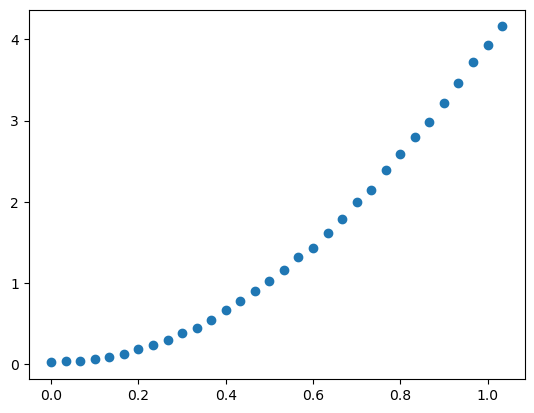

In [6]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

heightData = [0.0209976, 0.0419953, 0.0419953, 0.0629929, 0.0839905, 0.125986, 0.1889797, 0.230974, 0.293967, 0.377957, 0.44095, 0.545938, 0.671924,
             0.776912, 0.902898, 1.02888, 1.15487, 1.32285, 1.42784, 1.61682, 1.7848, 1.99487, 2.14176, 2.39373, 2.58271, 2.79269, 2.98166, 3.21264, 3.46461,
             3.71658, 3.92656, 4.15753]

#make our time data match with the height
TimeData = [i/30 for i in range(0,len(heightData))]

#we can use polyfit to easily find a function that fits the data
fit = np.polyfit(TimeData, heightData, deg = 4)
y_vals = np.polyval(fit, TimeData)

plt.plot(TimeData, heightData, 'o')
plt.show()

Now set $g = 9.80 \frac{m}{s^2}$ and calculate the values of $\sigma, v_0, y_0$ (just like before). <!-- use curve fit -->

<h2>Calculating the Energy Loss and Work Done</h2>
Now lets assign values to the velocities and the heights at the beginning and end of the motion.

In [28]:
dvdt = np.polyder(fit)

h0Value = heightData[0]
hfValue = heightData[-1]

#get our values from our polyfit
v0Value = np.polyval(dvdt, TimeData[0])
vfValue = np.polyval(dvdt, TimeData[-1])

print(v0Value, vfValue)

0.013057837944475055 7.368239184437421


The total energy loss using conservation of energy is:

In [22]:
m = 0.07
g = 9.80

print( (1/2) * m * (vfValue**2 - v0Value**2) - m * g * (hfValue - h0Value) )

-0.937483990381847


Now we can perfrom the analgous calculation using the work formalism.

In [ ]:
#W wasn't able to be defined earlier, in the theory.

<h2>Error Analysis</h2>
The values for the energy loss calculated above are different! ...only by a few percent, but still! Theoretically they should be identical if the model is correct and no experimental errors have been made. Because we cannont easily access the (systematic) error of the model, we will now focus on estimation of the experimental error.
<br><br>

First we can define the constants as replacement rules <!-- this doenst really exist in python -->

In [27]:
#This also must be changed to be able to be done with python.

<h2>Final Results/Conclusions</h2>
We have now calculated the work done with the two methods:
<br><br>

Conservation of Energy<br>
$\Delta E = -0.942 \pm 0.051 J$
<br><br>
External Work<br>
$W_{air} = -0.980 \pm 0.034 J$
<br><br>

So while the values are different, they agree within our uncertainties! Hooray!


<h2>Exercises</h2>
The assignment for Week 8 is to complete the following problems: <u>The submission should include your input code, the relevant outputs, and some sentences which explain the results.</u> The code should be self-contained and should run "in order"; that is, I should be able to a simply run your notebook from beginning to end in order to reproduce your outputs.
<h3>Exercise One</h3>
Complete the full analysis above for all three data sets taken in Lab 6 and the corresponding parameters calculated in Lab 7. This includes the relevant plots and a summary of your results regarding $\Delta E$ and $W$ with uncertainties.
<br>
<h3>Exercise Two</h3>
This lab tests the statement that $\Delta E = W_{nc}$, the work done by non-conservative forces. This raises the question: What is a conservative or non-conservative force? Answer in your own words. If you look things up online or in a textbook, <i>explicitly cite your sources</i>.
<br>
<h3>Exercise Three</h3>
Suppose we repeated this experiment on another planet... say, Mars, where the gravitational accelerate $g_mars = 3.711 \frac{m}{s^2} < g_{earth}$. What would change? Be concrete and thorough: which <i>specific</i>  quantites would change and which would stay the same (speed, acceleration, force, energy, etc.)?
<br>
<h3>Exercise Four</h3>
Write a full abstract for this lab, with all relevant numerical results and uncertainties included. What do you conclude from this experiment? How could it be improved?